In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

data = xr.open_dataset('era5_sst_1959_2021_25deg.nc')
data


<xarray.Dataset>
Dimensions:  (time: 756, lon: 144, lat: 73)
Coordinates:
  * time     (time) datetime64[ns] 1959-01-01 1959-02-01 ... 2021-12-01
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -87.5 -85.0 -82.5 -80.0 ... 82.5 85.0 87.5 90.0
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Thu Jul 07 12:24:21 2022: cdo remapbil,r144x73 era5_sst_195...
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...

In [2]:
lat = data.lat
lon = data.lon

In [3]:
sst = data.sst[1,:,:]

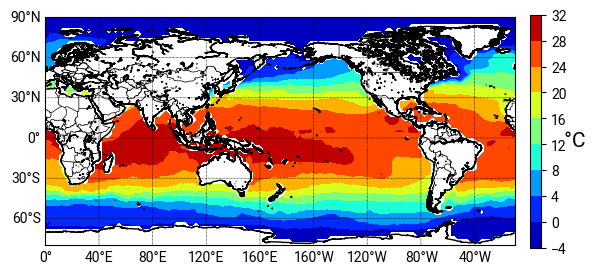

In [4]:
# Configurar a fonte global para "Montereal"
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['font.sans-serif'] = ['Roboto']

m = Basemap(projection='cyl', llcrnrlon=0, llcrnrlat=-80, urcrnrlon=350, urcrnrlat=90, resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-90,90+0.25,30)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(0,350+0.25,40)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, sst-273.15, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0C', fontsize=15, rotation=0)

plt.show()

In [5]:
# Calcular a média ao longo do eixo do tempo
sst_mean = data.sst.mean(dim='time')

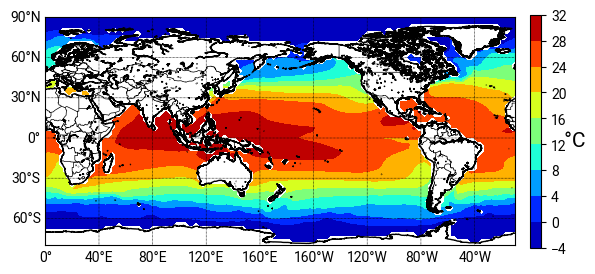

In [6]:
m = Basemap(projection='cyl', llcrnrlon=0, llcrnrlat=-80, urcrnrlon=350, urcrnrlat=90, resolution='i')
m.drawcoastlines(1)
m.drawcountries()

parallels = np.arange(-90,90+0.25,30)
m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.5)
meridians = np.arange(0,350+0.25,40)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.5)

cf = plt.contourf(lon, lat, sst_mean-273.15, cmap='jet')
cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
cb.set_label(' \u00b0C', fontsize=15, rotation=0)

plt.show()

In [9]:
# Converter 'time' para o formato de datetime se necessário
data['time'] = xr.cftime_range(start='1959-01', periods=756, freq='MS')
data['time']

<xarray.DataArray 'time' (time: 756)>
array([cftime.DatetimeGregorian(1959, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1959, 2, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1959, 3, 1, 0, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2021, 10, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 11, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 12, 1, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 1959-01-01 00:00:00 ... 2021-12-01 00:00:00

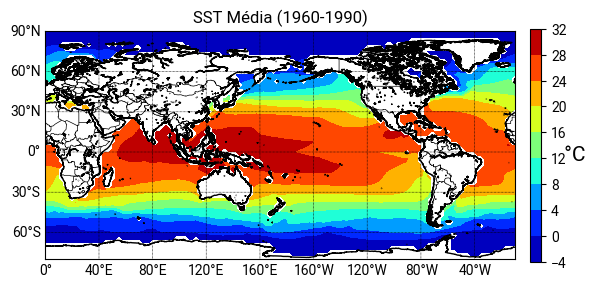

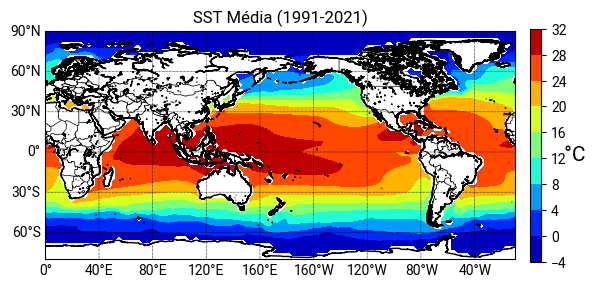

In [7]:
# Converter 'time' para o formato de datetime se necessário
data['time'] = xr.cftime_range(start='1959-01', periods=756, freq='MS')

# Selecionar o intervalo de tempo 1960-1990 e calcular a média
sst_1960_1990 = data.sel(time=slice('1960-01', '1990-12')).sst.mean(dim='time')

# Selecionar o intervalo de tempo 1991-2021 e calcular a média
sst_1991_2021 = data.sel(time=slice('1991-01', '2021-12')).sst.mean(dim='time')

# Obter latitudes e longitudes
lat = data.lat
lon = data.lon

# Função para plotar os dados em um mapa
def plot_sst(sst_mean, title):
    m = Basemap(projection='cyl', llcrnrlon=0, llcrnrlat=-80, urcrnrlon=350, urcrnrlat=90, resolution='i')
    m.drawcoastlines(1)
    m.drawcountries()

    parallels = np.arange(-90, 90+0.25, 30)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
    meridians = np.arange(0, 350+0.25, 40)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)

    cf = plt.contourf(lon, lat, sst_mean - 273.15, cmap='jet')
    cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
    cb.set_label(' \u00b0C', fontsize=15, rotation=0)

    plt.title(title)
    plt.show()

# Plotar a média de SST entre 1960-1990
plot_sst(sst_1960_1990, 'SST Média (1960-1990)')

# Plotar a média de SST entre 1991-2021
plot_sst(sst_1991_2021, 'SST Média (1991-2021)')

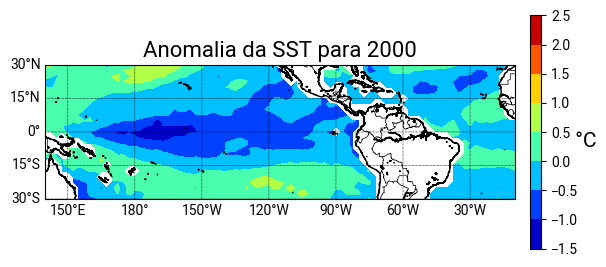

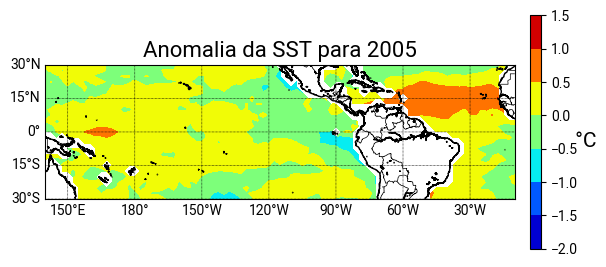

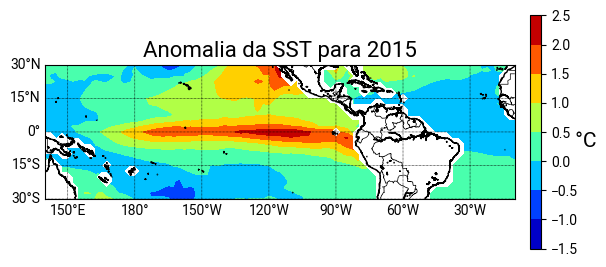

In [8]:
# Calcular a média da SST para o período de 1991-2021
sst_ref_period = data.sel(time=slice('1991-01', '2021-12')).sst.mean(dim='time')

# Extrair a SST para o ano de 2000
sst_2000 = data.sel(time=slice('2000-01', '2000-12')).sst.mean(dim='time')
# Extrair a SST para o ano de 2005
sst_2005 = data.sel(time=slice('2005-01', '2005-12')).sst.mean(dim='time')
# Extrair a SST para o ano de 2015
sst_2015 = data.sel(time=slice('2015-01', '2015-12')).sst.mean(dim='time')

# Calcular a anomalia: SST de 2000 menos a média do período de referência
sst_anomaly_2000 = sst_2000 - sst_ref_period
# Calcular a anomalia: SST de 2000 menos a média do período de referência
sst_anomaly_2005 = sst_2005 - sst_ref_period
# Calcular a anomalia: SST de 2015 menos a média do período de referência
sst_anomaly_2015 = sst_2015 - sst_ref_period


# Função para plotar os dados em um mapa
def plot_sst_anomaly(sst_anomaly, title):
    m = Basemap(projection='cyl', llcrnrlon=140, llcrnrlat=-30, urcrnrlon=350, urcrnrlat=30, resolution='i')
    m.drawcoastlines(1)
    m.drawcountries()

    parallels = np.arange(-90, 90+0.25, 15)
    m.drawparallels(parallels, labels=[1, 0, 0, 0], linewidth=0.5)
    meridians = np.arange(0, 350+0.25, 30)
    m.drawmeridians(meridians, labels=[0, 0, 0, 1], linewidth=0.5)

    cf = plt.contourf(lon, lat, sst_anomaly, cmap='jet')
    cb = plt.colorbar(cf, fraction=0.0235, pad=0.03)
    cb.set_label(' \u00b0C', fontsize=15, rotation=0)

    plt.title(title, fontsize=16)
    # plt.xlabel('Longitude', fontsize=14)
    # plt.ylabel('Latitude', fontsize=14)

    plt.show()

# Plotar a anomalia da SST para 2000
plot_sst_anomaly(sst_anomaly_2000, 'Anomalia da SST para 2000')
# Plotar a anomalia da SST para 2005
plot_sst_anomaly(sst_anomaly_2005, 'Anomalia da SST para 2005')
# Plotar a anomalia da SST para 2015
plot_sst_anomaly(sst_anomaly_2015, 'Anomalia da SST para 2015')
